In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns

## Data Cleaning and Outlier Handling

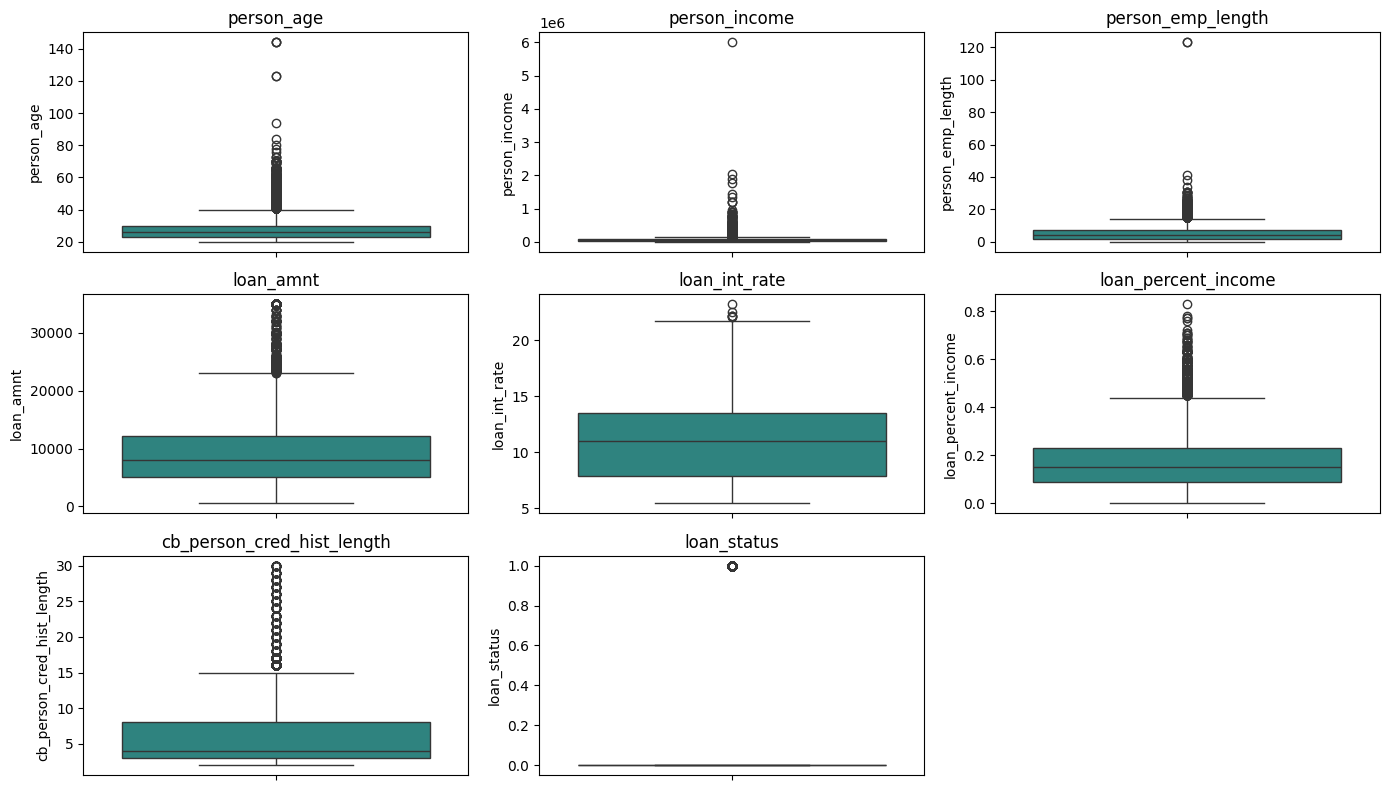

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(14,8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[col], palette='viridis')
    plt.title(col)
plt.tight_layout()
plt.show()
plt.savefig("boxplot.png")

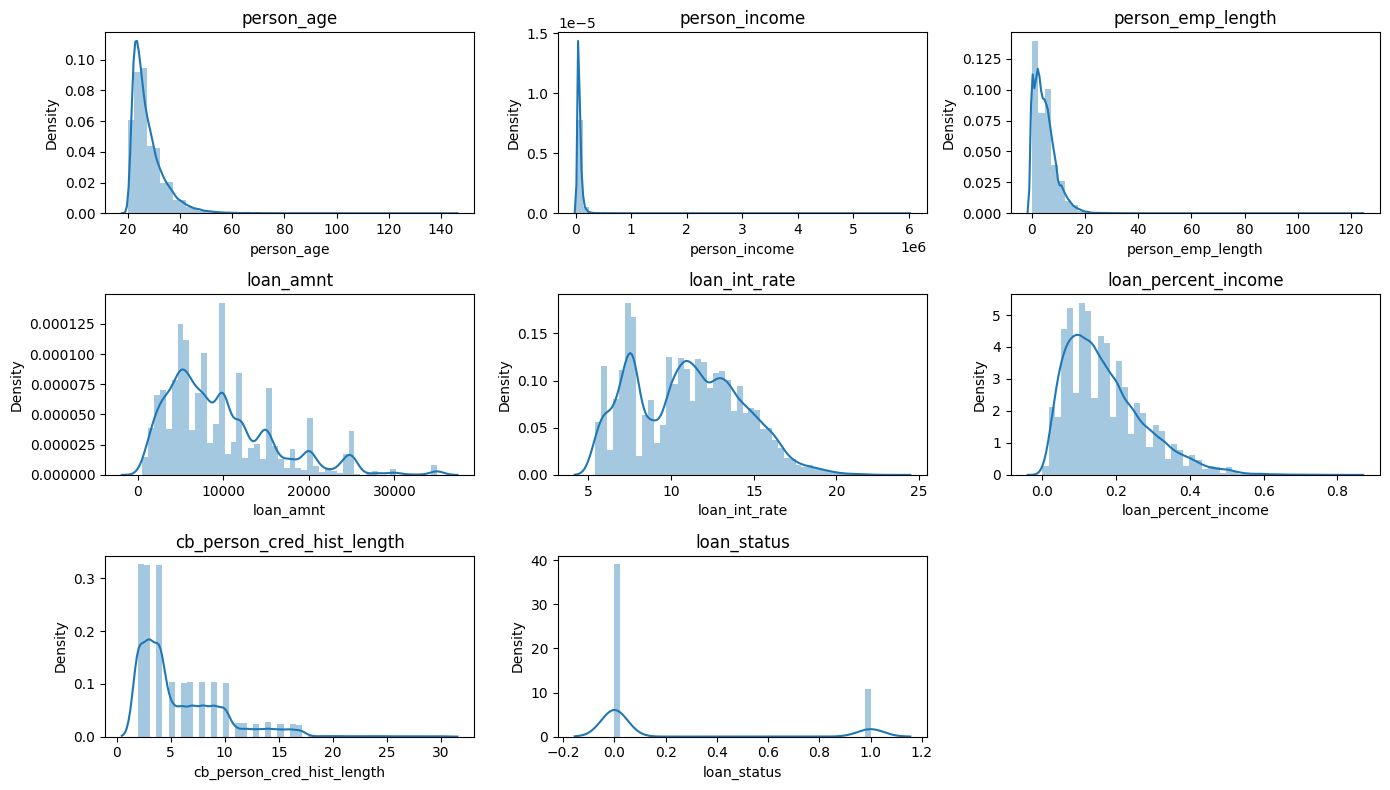

In [7]:
plt.figure(figsize=(14,8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.distplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
def trim_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply on specific columns
columns_to_trim = ['person_age','person_income', 'person_emp_length']
for col in columns_to_trim:
    df = trim_outliers(df, col)

df.shape

(30976, 12)

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,30976.000000,30976.000000,30976.000000,30976.000000,27989.000000,30976.000000,30976.000000,30976.000000
mean,27.422714,62663.764979,4.721397,9543.030088,11.026937,0.171127,5.625065,0.216361
std,5.561887,33107.255028,3.909648,6206.397205,3.226794,0.106155,3.708375,0.411770
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.010000,2.000000,0.000000
25%,23.000000,39000.000000,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,78000.000000,7.000000,12000.000000,13.470000,0.230000,8.000000,0.000000
max,51.000000,200100.000000,22.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [10]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,2987
loan_percent_income,0
cb_person_default_on_file,0


In [11]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


## Visualization

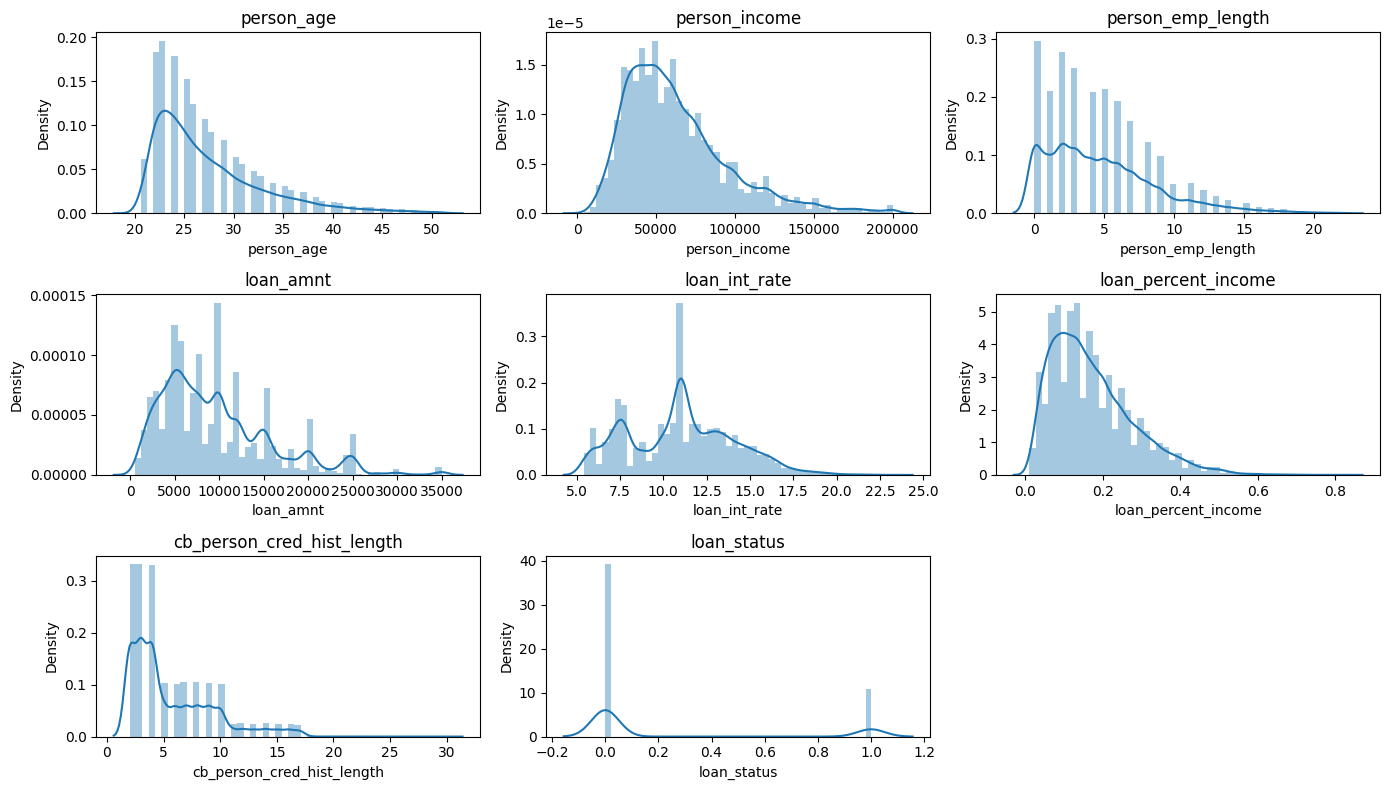

In [12]:
plt.figure(figsize=(14,8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.distplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

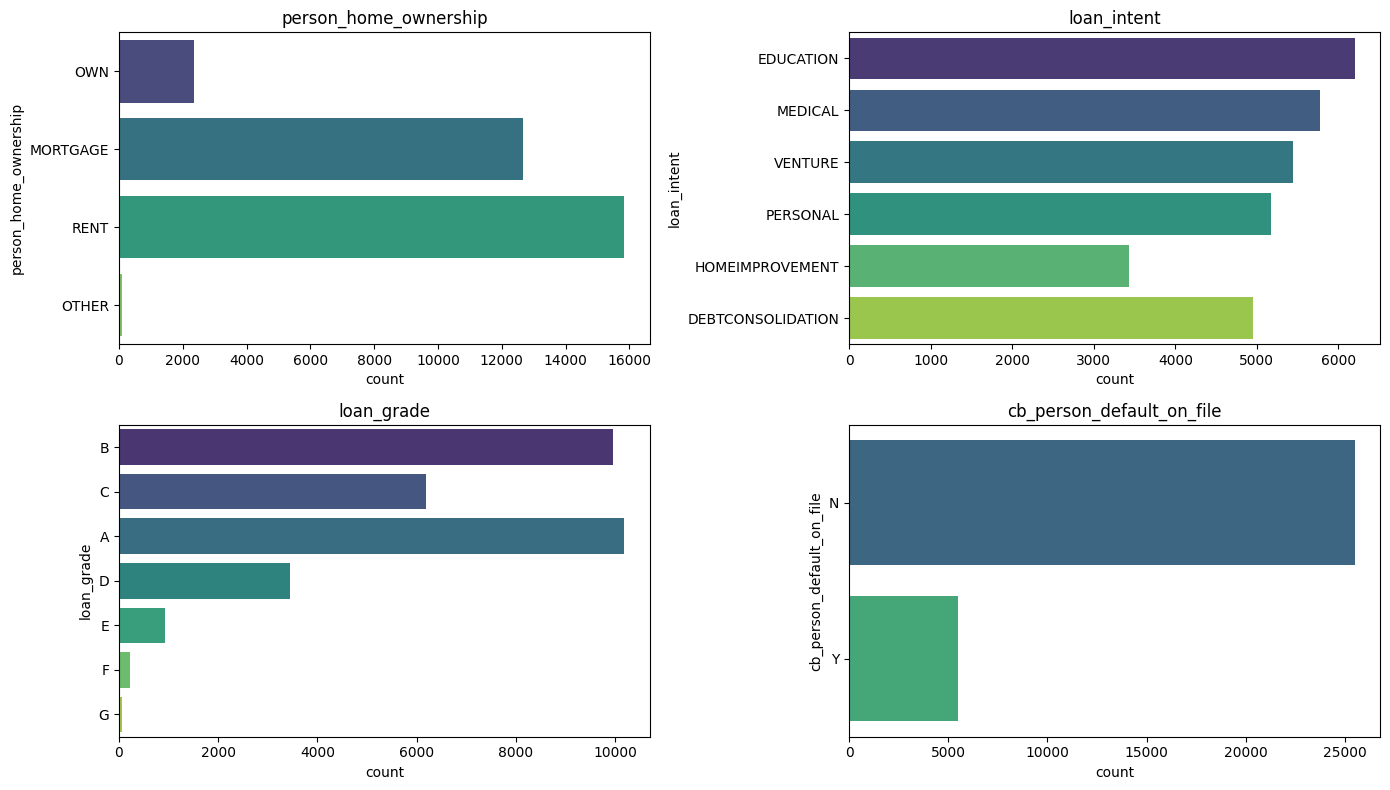

In [13]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(df[col], palette='viridis')
    plt.title(col)
plt.tight_layout()
plt.show()

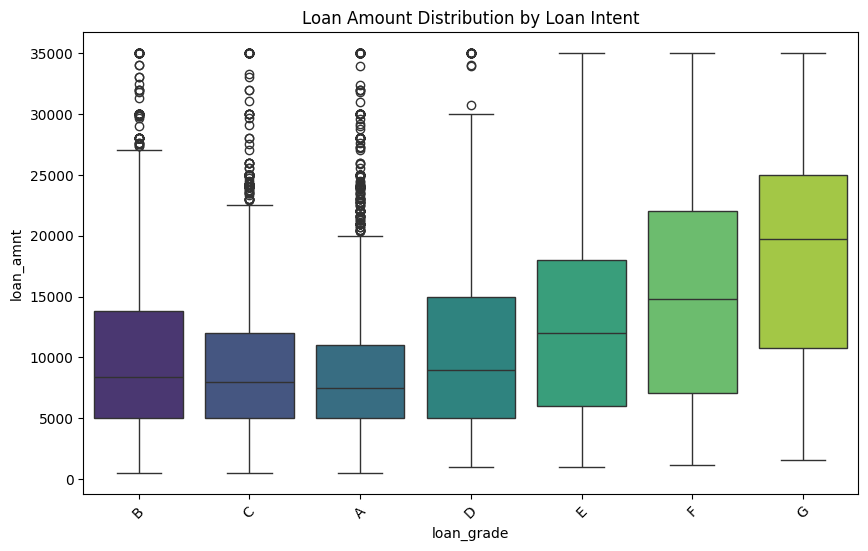

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_grade', y='loan_amnt', data=df, palette='viridis')
plt.title('Loan Amount Distribution by Loan Intent')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

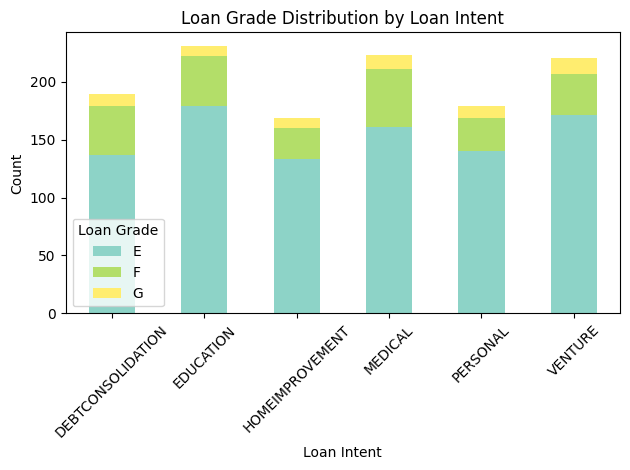

In [15]:
# Filter the DataFrame for grades A, C, and F
filtered_grades = ['E', 'F', 'G']
filtered_df = df[df['loan_grade'].isin(filtered_grades)]

# Create a crosstab for loan_grade vs. loan_intent
loan_grade_vs_intent = pd.crosstab(filtered_df['loan_intent'], filtered_df['loan_grade'])

# Plot the result
plt.figure(figsize=(10, 6))
loan_grade_vs_intent.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Loan Grade Distribution by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Grade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

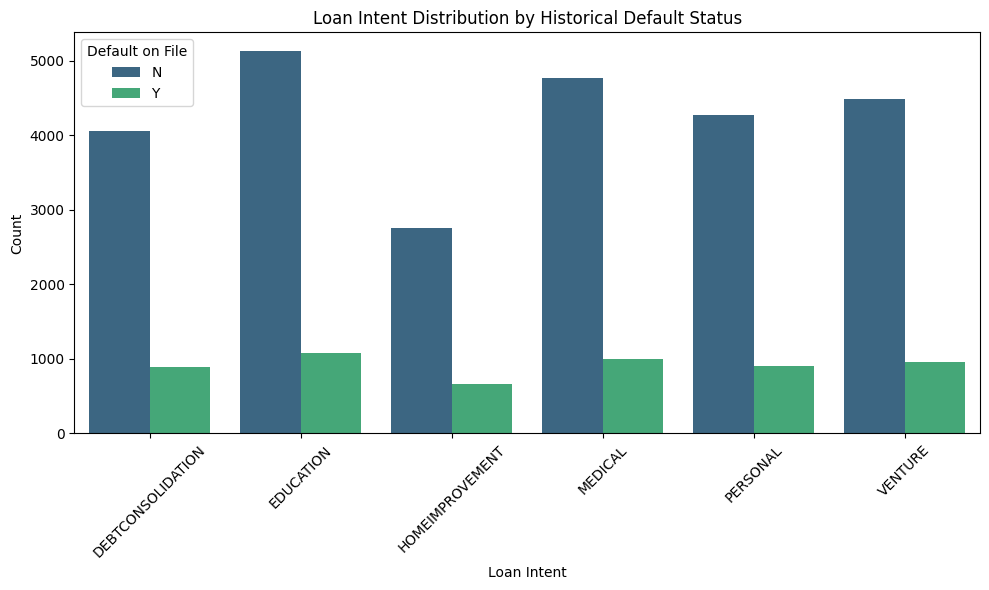

In [16]:
# Calculate the distribution of loan intent grouped by historical defaults
loan_intent_distribution = df.groupby(['loan_intent', 'cb_person_default_on_file']).size().reset_index(name='count')

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_intent', y='count', hue='cb_person_default_on_file', data=loan_intent_distribution, palette='viridis')
plt.title('Loan Intent Distribution by Historical Default Status')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
legend = plt.legend(title='Default on File')
plt.tight_layout()
plt.show()

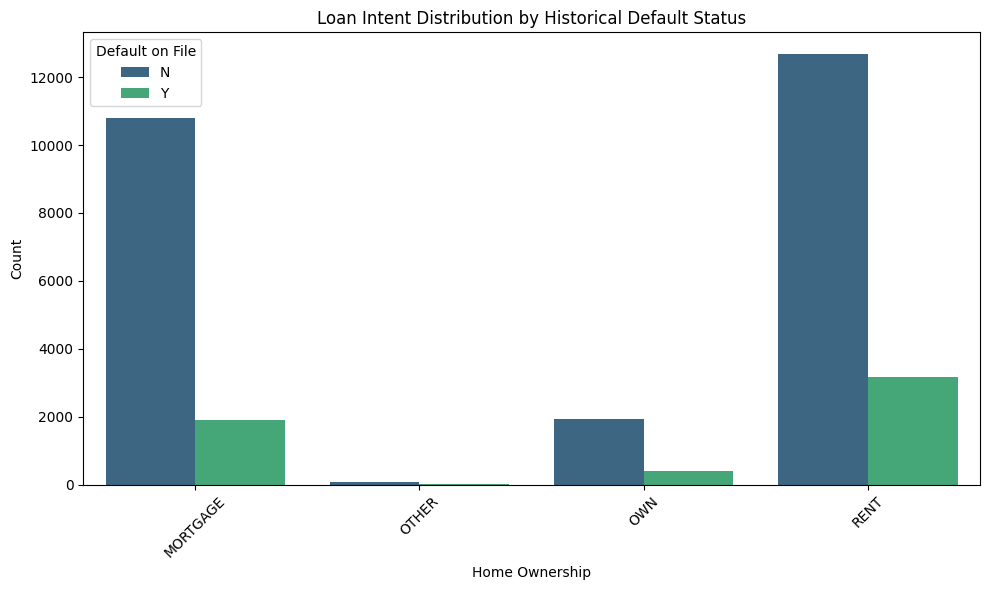

In [17]:
# Calculate the distribution of loan intent grouped by historical defaults
loan_intent_distribution = df.groupby(['person_home_ownership', 'cb_person_default_on_file']).size().reset_index(name='count')

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='person_home_ownership', y='count', hue='cb_person_default_on_file', data=loan_intent_distribution, palette='viridis')
plt.title('Loan Intent Distribution by Historical Default Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
legend = plt.legend(title='Default on File')
plt.tight_layout()
plt.show()

In [18]:
df.to_csv("cleaned_data.csv", index=False)